
# Лабораторная работа 3
## Метрические методы классификации

In [ ]:
import pandas as pd
import numpy as np

data_source = 'stocks_dataset_comp.csv'
d = pd.read_table(data_source, delimiter=',')

d.head()

,dividend yield,company capitalization,volatility,company age,answer
0,25.1,875.3,51.7,7,high-risk
1,20.4,548.2,55.1,4,high-risk
2,19.2,979.1,23.7,7,high-risk
3,25.9,318.2,36.1,3,high-risk
4,23.7,433.9,56.4,4,high-risk


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dividend yield          150 non-null    float64
 1   company capitalization  150 non-null    float64
 2   volatility              150 non-null    float64
 3   company age             150 non-null    int64  
 4   answer                  150 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB


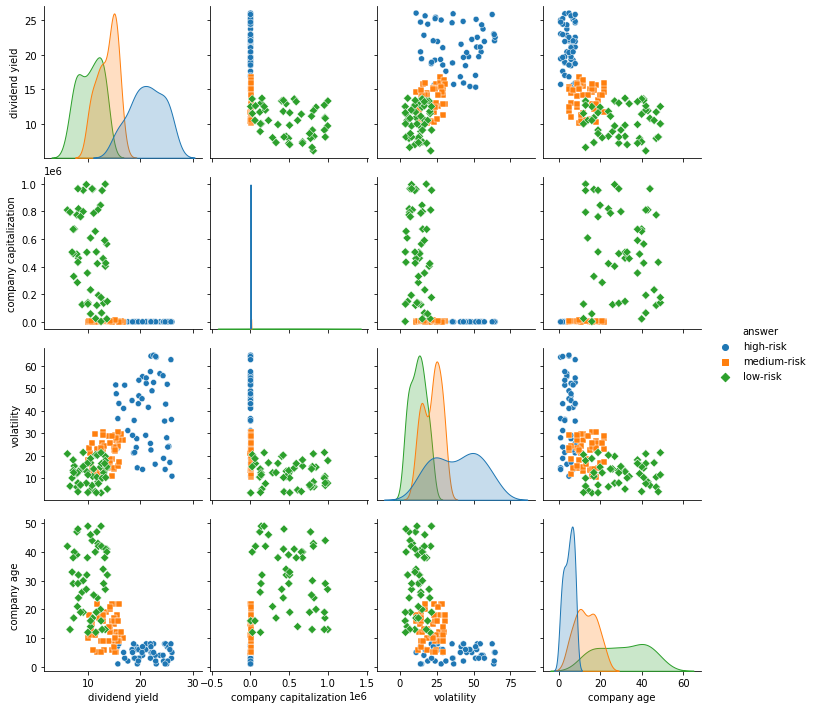

In [ ]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='answer', markers=["o", "s", "D"])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train = d[['dividend yield', 'company capitalization', 'volatility', 'company age']]
y_train = d['answer']

K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_test = np.array([[15.2, 10, 24.1, 7]])
# Получение ответа для нового объекта
target = knn.predict(X_test)
print(target)


['high-risk']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = \
            train_test_split(d.iloc[ :, 0:4 ], 
                             d['answer'], 
                             test_size=0.3, 
                             random_state=17)
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.7777777777777778


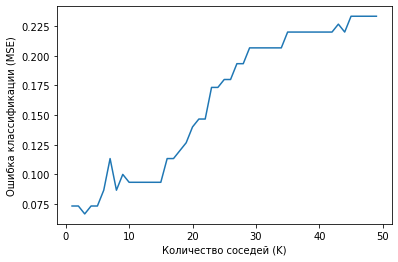

Оптимальные значения K:  [3]


In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d.iloc[ : , 0:4 ], d['answer'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)


In [ ]:
dX = d.iloc[:,0:4]
dy = d['answer']

plot_markers = ['r*', 'g^', 'bo']
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(4, 4, figsize=(16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 0.02  

# Обходим все subplot
for i in range(0,4):
    for j in range(0,4):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=13)
            model.fit(dX.iloc[:, [i,j]], dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p[p==answers[2]] = 2
            places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j], 
                                  plot_markers[id_answer], 
                                  label=answers[id_answer], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(dX.columns[j])
        
        if i==3:
            places[i, j].set_xlabel(dX.columns[i])
        
    
        